<h2>Kmeans Clustering</h2>

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [136]:
data = pd.read_csv("py-master/ML/13_kmeans/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [137]:
#checks on the data generally
data.isnull().sum().sum()


0

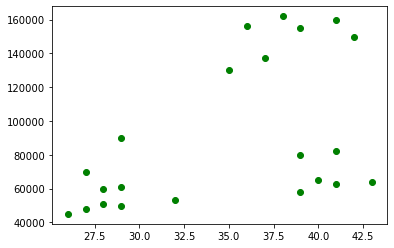

In [138]:
#plotting out the data 

%matplotlib inline
plt.scatter(data["Age"] , data["Income($)"] , color = "green" , marker = "o")


In [139]:
km = KMeans(n_clusters=3)

In [140]:
km

KMeans(n_clusters=3)

In [141]:
y_predicted = km.fit_predict(data[['Age' , 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [142]:
data["cluster"] = y_predicted

In [143]:
data

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [144]:
sl = MinMaxScaler()

In [145]:
data["Age"] = sl.fit_transform(data[['Age']])

In [146]:
data["Income($)"] = sl.fit_transform(data[["Income($)"]])

In [147]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [148]:
#prediction again

new_pred = km.fit_predict(data[["Age" , "Income($)"]])

In [149]:
data["cluster_New"] = new_pred

In [150]:
data.head()

,Name,Age,Income($),cluster,cluster_New
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0


In [151]:
data.drop("cluster" , axis = "columns" , inplace = True)

In [152]:
data.head()

,Name,Age,Income($),cluster_New
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [153]:
data1 = data[data.cluster_New == 0]
data1

,Name,Age,Income($),cluster_New
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0
10,Donald,0.647059,0.786325,0


In [154]:
data2 = data[data.cluster_New == 1]
data2

,Name,Age,Income($),cluster_New
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
11,Tom,0.000000,0.000000,1
12,Arnold,0.058824,0.025641,1
13,Jared,0.117647,0.051282,1
14,Stark,0.176471,0.038462,1
15,Ranbir,0.352941,0.068376,1


In [155]:
data3 = data[data.cluster_New == 2]
data3

,Name,Age,Income($),cluster_New
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2
21,Abdul,0.764706,0.111111,2


Text(0, 0.5, 'Income')

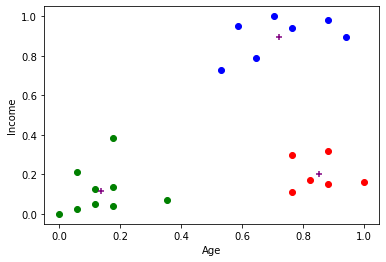

In [156]:
%matplotlib inline
plt.scatter(data1["Age"], data1["Income($)"]  , color = "blue")
plt.scatter(data2["Age"], data2["Income($)"]  , color = "green")
plt.scatter(data3["Age"], data3["Income($)"]  , color = "red")
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[: , 1], color = "purple" , marker = "+" )
plt.xlabel("Age")
plt.ylabel("Income")

In [157]:
#checking my centriods of my ks

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [158]:
#checks on the bestK Elbow technique
k_rng = range(1,10)
sse = []

for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(data[["Age" , "Income($)"]])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [159]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.2187801089333045,
 0.1685851223602976,
 0.13265419827245162,
 0.10907864282306068]

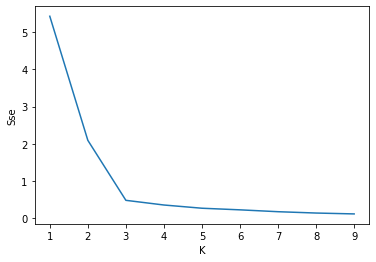

In [160]:
#visualize the elbow chart
plt.xlabel("K")
plt.ylabel("Sse")
plt.plot(k_rng , sse)

<h2>Exercise</h2>

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [100]:
l_iris = load_iris()
dir(l_iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [101]:
iris_cluster = KMeans(n_clusters=2)
iris_cluster

KMeans(n_clusters=2)

In [102]:
data = pd.DataFrame(l_iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
data["cluster"] = l_iris.target
data

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
mM = MinMaxScaler()
mM

MinMaxScaler()

In [105]:
data_1 =data[data.cluster == 0]
data_1.head()

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [106]:
data_2 = data[data.cluster == 1]
data_2.head()

,0,1,2,3,cluster
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [107]:
data_3 = data[data.cluster == 2]
data_3.head()

,0,1,2,3,cluster
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


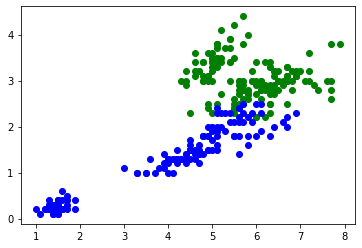

In [108]:
%matplotlib inline
plt.scatter(data[0] , data[1] , color = "green" , marker = "o")
plt.scatter(data[2] , data[3] , color = "blue" , marker = "o")

In [109]:
mt = MinMaxScaler()

In [110]:
data[0] = mt.fit_transform(data[[0]])
data[0]

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: 0, Length: 150, dtype: float64

In [111]:
data[1] = mt.fit_transform(data[[1]])
data[1]

0      0.625000
1      0.416667
2      0.500000
3      0.458333
4      0.666667
         ...   
145    0.416667
146    0.208333
147    0.416667
148    0.583333
149    0.416667
Name: 1, Length: 150, dtype: float64

In [112]:
data[2] = mt.fit_transform(data[[2]])
data[2]

0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: 2, Length: 150, dtype: float64

In [113]:
data[3] = mt.fit_transform(data[[3]])
data[3]

0      0.041667
1      0.041667
2      0.041667
3      0.041667
4      0.041667
         ...   
145    0.916667
146    0.750000
147    0.791667
148    0.916667
149    0.708333
Name: 3, Length: 150, dtype: float64

In [114]:
data

,0,1,2,3,cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [115]:
#predicting the data
data["cluster_predict"] = iris_cluster.fit_predict(data[[0,1,2,3]])
data.head()

,0,1,2,3,cluster,cluster_predict
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1


In [116]:
data.drop("cluster" , axis = "columns" , inplace = True)

In [117]:
data.head()

,0,1,2,3,cluster_predict
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


In [118]:
dataNew1 = data[data["cluster_predict"] == 0]
dataNew1.head()

,0,1,2,3,cluster_predict
50,0.750000,0.500000,0.627119,0.541667,0
51,0.583333,0.500000,0.593220,0.583333,0
52,0.722222,0.458333,0.661017,0.583333,0
53,0.333333,0.125000,0.508475,0.500000,0
54,0.611111,0.333333,0.610169,0.583333,0


In [119]:
dataNew2 = data[data["cluster_predict"] == 1]
dataNew2.head()

,0,1,2,3,cluster_predict
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


In [120]:
dataNew3 = data[data["cluster_predict"] == 2]
dataNew3.head()

,0,1,2,3,cluster_predict


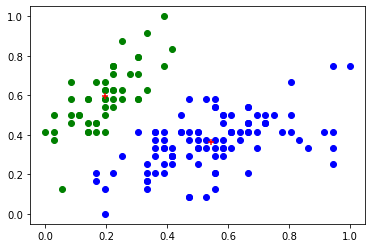

In [121]:
%matplotlib inline
plt.scatter(dataNew1[0], dataNew1[1] , color = "blue" )
plt.scatter(dataNew2[0], dataNew2[1] , color = "green" )
plt.scatter(dataNew3[0], dataNew3[1] , color = "red" )
plt.scatter(iris_cluster.cluster_centers_[: , 0], iris_cluster.cluster_centers_[: , 1] , color = "red" , marker = "+" )

In [122]:
#how to get the specific k
sse = []
k_rng = range(1,9)

for i in k_rng:
    iris_clust = KMeans(n_clusters = i)
    iris_clust.fit(data[[0,1,2,3]])
    sse.append(iris_clust.inertia_)
    
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [123]:
sse

[41.16611042137328,
 12.12779075053819,
 6.982216473785234,
 5.516933472040375,
 4.583940799311901,
 3.924825639027848,
 3.487477752663564,
 3.1293899105044005]

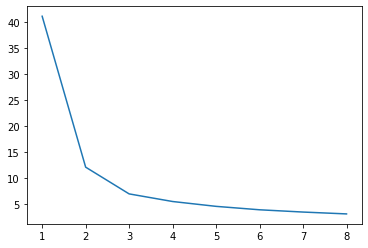

In [124]:
plt.plot(k_rng , sse)